In [ ]:
####1 upload and load house price csv for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
####2 handle missing values & enclode categorical data
print("\nMissing Values Per Column:")
print(data.isnull().sum())


Missing Values Per Column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
# Option 2: Fill missing values with the column mean (numerical columns only)
df_filled_mean = data.fillna(data.mean(numeric_only=True))
print("\nData After Filling Missing Values with Column Mean:")
print(df_filled_mean.head())


Data After Filling Missing Values with Column Mean:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800

In [ ]:
# Handling missing values: Example - Fill missing values with the column mean
df_cleaned = data.fillna(data.mean(numeric_only=True))

In [ ]:
####3 split the data for training & testing

# Assuming the last column is the target variable
X = df_cleaned.iloc[:, :-1]  # All columns except the last one
y = df_cleaned.iloc[:, -1]   # Last column as target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Display the shapes of the resulting datasets
print("\nShapes of Training and Testing Sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes of Training and Testing Sets:
X_train: (3680, 17), X_test: (920, 17)
y_train: (3680,), y_test: (920,)


In [ ]:
#sub section
# Step 3: Select relevant features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated']
target = 'price'
data_cleaned = data.dropna(subset=features + [target])

In [ ]:
# Drop rows with missing values in the selected columns
data_cleaned = data.dropna(subset=features + [target])  # Ensure no missing values
X = data_cleaned[features]

# Drop non-numeric columns if necessary
if not X.select_dtypes(include=['number']).equals(X):
    print("Dropping non-numeric columns automatically...")
    X = X.select_dtypes(include=['number'])  # Keep only numeric columns

y = data_cleaned[target]
y = pd.to_numeric(y, errors='coerce')  # Ensure target is numeric

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
###4 train a linear regression model with scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 6: Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 986921767056.0986
R² Score: 0.032283856632802865


In [ ]:
##5 Predict house prices on the test data
y_pred = model.predict(X_test)

# Combine predictions with actual values for comparison
predictions = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Display the first few rows of the predictions
print(predictions.head())

      Actual Price  Predicted Price
3683      544000.0     3.048634e+05
4411           0.0     3.265171e+05
2584     1712500.0     1.071763e+06
69        365000.0     5.462414e+05
1844      275000.0     3.798000e+05


In [ ]:
####6
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 986921767056.0986
R² Score: 0.032283856632802865


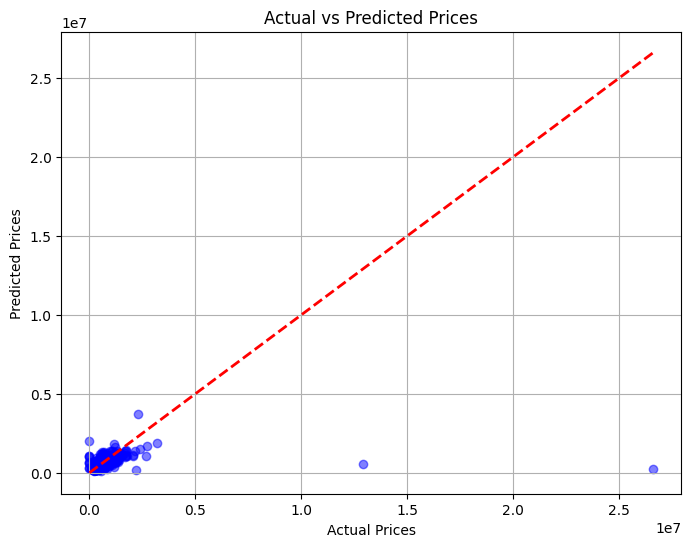

In [ ]:
###7 plot

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 986921767056.0986
R² Score: 0.032283856632802865
